In [2]:
import sympy
sympy.init_printing()
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# SG to ethanol mass % conversion

In [3]:
sge, sgw, xe3, xe7 = sympy.symbols('SG_et, SG_w, x_et3, x_et7 ', postive = True)

sge = 0.79
sgw = 1 

sge, sgw, xe3, xe7 

In [4]:
# Stage:[1,      2,     3,     4,     5,    6,      7,     8,    9,     10,    PR]
SG_3 = [0.881, 0.864, 0.924, 0.942, 0.953, 0.963, 0.971, 0.981, 0.986, 0.991, 0.997]

SG_7 = [0.892, 0.890, 0.939, 0.959, 0.976, 0.978, 0.965, 0.968, 0.979, 0.984, 0.994]

In [5]:
x_et3a = []
x_et7a = []

for index,value in enumerate(SG_3):
    x3 = sympy.solve(- 1/SG_3[index] + xe3/sge + (1-xe3)/sgw, xe3)
    x7 = sympy.solve(- 1/SG_7[index] + xe7/sge + (1-xe7)/sgw, xe7)
    x_et3a.append(x3[0])
    x_et7a.append(x7[0])
    

print ('x_et3', x_et3a)

print ('x_et7', x_et7a)

x_et3 [0.508134695421870, 0.592151675485009, 0.309420737992167, 0.231624709331716, 0.185529405886174, 0.144538396874845, 0.112353489284488, 0.0728605407504488, 0.0534144692359702, 0.0341646244774398, 0.0113196733056312]
x_et7 [0.455477258167839, 0.464954521134296, 0.244383589431513, 0.160832216098118, 0.0925058548009368, 0.0846236245009251, 0.136442141623489, 0.124360487996852, 0.0806945863125637, 0.0611691831204026, 0.0227076746191434]


# Refractive index to ethanol mass % conversion

    - conversion done with table from http://www.refractometer.pl/refraction-datasheet-ethanol

In [6]:
# Stage:[1,      2,     3,     4,     5,      6,      7,     8,     9,      10,    PR]
RI_3 = [1.363, 1.364, 1.358, 1.355, 1.3525, 1.3494, 1.344, 1.339, 1.3375, 1.3365, 1.333]

RI_7 = [1.363, 1.362, 1.355, 1.3508, 1.343, 1.342, 1.346, 1.346, 1.341, 1.339, 1.335]

In [7]:

x_et3b = [0.56, 0.618, 0.395, 0.338, 0.283, 0.237, 0.16, 0.095, 0.071, 0.058, 0.00]

x_et7b = [0.56, 0.519, 0.338, 0.256, 0.144, 0.138, 0.186, 0.186, 0.12, 0.094, 0.036]

print (len(x_et3b), len(x_et7b))

11 11


In [8]:
N = np.arange(1, 11 + 1, 1)
N

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

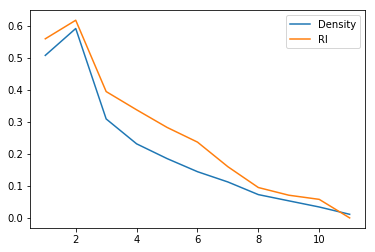

In [9]:
plt.plot(N, x_et3a, label = 'Density')
plt.plot(N, x_et3b, label = 'RI')
plt.legend(loc = 'best')

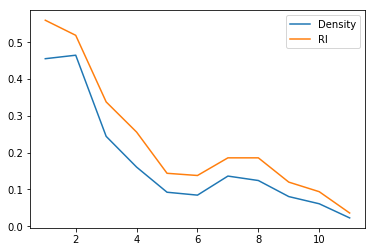

In [10]:
plt.plot(N, x_et7a, label = 'Density')
plt.plot(N, x_et7b, label = 'RI')
plt.legend(loc = 'best')

# Average ethanol % from SG and RI

In [11]:
x_et3 = []
x_et7 = []

for index,value in enumerate(x_et3a):
    a = (x_et3a[index] + x_et3b[index])/2
    b = (x_et7a[index] + x_et7b[index])/2
    x_et3.append(a)
    x_et7.append(b)
    
print ('x_et3:', x_et3)

print ('x_et7:', x_et7)

x_et3: [0.534067347710935, 0.605075837742504, 0.352210368996083, 0.284812354665858, 0.234264702943087, 0.190769198437423, 0.136176744642244, 0.0839302703752244, 0.0622072346179851, 0.0460823122387199, 0.00565983665281559]
x_et7: [0.507738629083920, 0.491977260567148, 0.291191794715756, 0.208416108049059, 0.118252927400468, 0.111311812250463, 0.161221070811744, 0.155180243998426, 0.100347293156282, 0.0775845915602013, 0.0293538373095717]


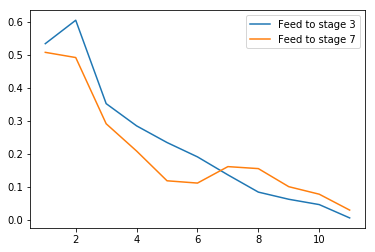

In [12]:
plt.plot(N, x_et3, label = 'Feed to stage 3')
plt.plot(N, x_et7, label = 'Feed to stage 7')
plt.legend(loc = 'best')

In [13]:
xSS1 = [0.505086314, 0.588599263, 0.307564473, 0.230235156,0.184416385,0.143671288,0.111679463,0.072423439,0.053094027,
        0.033959665, 0.011251765]
xSS2 = [0.452744777,0.462165185,0.242917493,0.159867358,0.091950897,0.084115954,0.135623603,0.12361443,0.080210487,
        0.060802219,0.022571448]

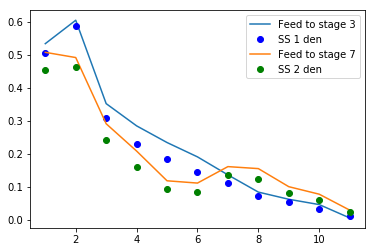

In [14]:
plt.plot(N, x_et3, label = 'Feed to stage 3')
plt.plot(N, xSS1, 'bo', label = 'SS 1 den')
plt.plot(N, x_et7, label = 'Feed to stage 7')
plt.plot(N, xSS2, 'go', label = 'SS 2 den')
plt.legend(loc = 'best')

# Calculations

# Steady State 1 
### Feed @ Stage 3

In [15]:
# Column pressure
P1 = 4.85 # kPag

# Feed
T1 = 40.9 + 273.15 # K
F1 = 60 # kg/h

# Distillate
D1 = 16.5 # kg/h
# Reflux
R1 = 24 # kg/h
Tr1 = 45 + 273.15

# Bottoms
B1 = 43 # kg/h

In [16]:
# Partial reboiler
PR1 = 37.2 # kg/h
Tpr1_in = 95 + 273.15 # K
Tpr1_out = 96.9 + 273.15 # K
# Bottoms condersor
Bc1 =  127.8 # kg/h
Tbc1_in =  18.9 + 273.15 # K
Tbc1_out = 33.5 + 273.15 # K
# Distillate condensor
# Dc1 =  unknown # kg/h
Tdc1_in = 18.9 + 273.15 # K
Tdc1_out =  34 + 273.15 # K

In [17]:
# stage temperatures 
T1a = 77 + 273.15 # K
T2a = 77.98 + 273.15 # K
T3a = 81.74 + 273.15 # K
T4a = 82.48 + 273.15 # K
T5a = 84.18 + 273.15 # K
T6a = 86.61 + 273.15 # K
T7a = 89.78 + 273.15 # K
T8a = 92.92 + 273.15 # K
T9a = 94.52 + 273.15 # K
T10a = 96 + 273.15 # K

In [18]:
# heat exchager areas
Ad = 1 # m2
Ab = 0.4 # m2
Ar = 1 # m2

# levels (%)
Lrd1 = 0.5
Lr1 = 0.33

# steam P
Ps1 = 1000 # kPag

##### Find feed conc 
- $ x_B = x_P $
- $ x_D = x_1 $ 

$$ x_F = \frac{x_BB + x_DD}{D + B} $$

In [19]:
xD1 = 0.66

In [20]:
Xf1 = sympy.symbols('x_F1', positive = True)

xf1 = sympy.solve(Xf1*(D1 + B1) - x_et3[-1]*B1 - xD1*D1, Xf1)

xf1[0]

#### Energy balance

$$ ΔH_F + Q_R = ΔH_B + ΔH_D + Q_C + Q_B + Q_L $$

In [21]:
# differance btween in and out of tank
diff1 = F1 - (B1 + D1)

diff1
# at SS F becomes B + D so this value is used for calculations

- Assume that the temperature of the subcooled feed is a linear combination of the distillate and bottoms
- $FT_F = DT_D + BT_B$

In [22]:
Tb1 = ((D1 + B1)*T1 - D1*Tr1)/B1
print(Tb1-273.15)

39.32674418604654


In [23]:
Cpw = 4.186 # kJ/kg.K
Cpe = 2.57 # kJ/kg.K
Tref = 298.15 # K
λw = 40.65*1000/18 # kJ/kg
λe = 841 # kJ/kg

ΔHf1 = ((B1 + D1)*(xf1[0]*Cpe + (1 - xf1[0])*Cpw)*(T1 - Tref))/3600
ΔHb1 = ((B1)*(x_et3[-1]*Cpe + (1 - x_et3[-1])*Cpw)*(Tb1 - Tref))/3600
ΔHd1 = ((D1)*(xD1*Cpe + (1 - xD1)*Cpw)*(Tr1 - Tref))/3600
Qr1 = ((PR1)*(x_et3[-1]*Cpe + (1 - x_et3[-1])*Cpw)*(Tpr1_out - Tpr1_in) + (PR1)*((x_et3[-1]*λe + (1 - x_et3[-1])*λw)))/3600
Qc1 = (((D1 + R1)*(xD1*Cpe + (1 - xD1)*Cpw)*(Tr1 - T1a)) + (D1 + R1)*(xD1*λe + (1 - xD1)*λw))/3600
Qb1 = (Bc1)*(Cpw)*(Tbc1_out - Tbc1_in) / 3600

print (ΔHf1, ΔHb1, ΔHd1, Qr1, Qc1, Qb1, 'kW')

1.02058332261212 0.714764090091705 0.28594866666666663 23.3352239622901 13.759551600000002 2.169603800000003 kW


In [24]:
Qr1, Qc1, 'kW'

(23.3352239622901, 13.759551600000002, 'kW')

In [25]:
# Aspen Results:
Qr1_aspen = 18.14 #kW
Qc1_aspen = 13.62 #kW

In [26]:
Ql1 = sympy.symbols('Q_l1', positive = True)

sol1 = sympy.solve(ΔHf1 - ΔHb1 - ΔHd1 + Qr1 - Qc1 - Qb1 - Ql1, Ql1)
Qloss1 = sol1[0]

print ('Qloss =', Qloss1, 'kW')

Qloss = 7.42593912814379 kW


### Calculations of other important parameters/values of the system

In [27]:
# Q loss of just the bottoms condensor
Qb1_stream = ((B1)*(x_et3[-1]*Cpe + (1 - x_et3[-1])*Cpw)*(Tb1 - T10a))/3600
Qb1_stream, Qb1, 'kW'

(-2.82743989830205, 2.169603800000003, 'kW')

In [28]:
Qloss_B1 = abs(Qb1_stream + Qb1)
print ('Q loss of BC', Qloss_B1, 'kW')

Q loss of BC 0.657836098302044 kW


In [29]:
# Q loss of the partial reboiler and condenser wrt to the ideal Aspen Results
Qloss_C1 = abs(Qc1 - Qc1_aspen)
print ('Q loss of Distilate C', Qloss_C1, 'kW')

Qloss_R1 = abs(Qr1 - Qr1_aspen)
print ('Q loss of Reboiler', Qloss_R1, 'kW')

Q loss of Distilate C 0.13955160000000255 kW
Q loss of Reboiler 5.19522396229005 kW


In [30]:
# Q loss of the column itself
Qloss_column1 = Qloss1 - Qloss_B1 - Qloss_C1 - Qloss_R1
print('Q loss of column', Qloss_column1, 'kW')

Q loss of column 1.43332746755169 kW


In [31]:
# Mass flow of cooling water for the distilate condenser
mw1 = sympy.symbols('m_w1', positive = True)

W1 = sympy.solve((Qc1 - Qloss_C1)*3600 - mw1*(Cpw)*(Tdc1_out - Tdc1_in), mw1)

print ('Mass flow of utility water:', W1[0], 'kg/h')

print (W1[0]/3600, ('kg/s'))

Mass flow of utility water: 775.717228351837 kg/h
0.215477007875510 kg/s


In [60]:
# Mass flow of steam in reboiler
ms1, v1 = sympy.symbols('m_s1, v_1', positive = True)

Tin = 453 # K (Tsat of steam at 1000kPa)
Tout = 368.94 # K (Tsat of steam at 87kPa)

S1 = sympy.solve(Qr1 + ms1*Cpw*(Tout - Tin), ms1)

print ('Mass flow of steam:', S1[0], 'kg/h')

v1 = 1973 + (1870-1970)*(0.087-0.085)/(0.09-0.085)

print (v1/1000, 'm3/kg')

print ((v1/1000)*S1[0], 'm3/h')

Mass flow of steam: 0.0663167697381370 kg/h
1.9330000000000003 m3/kg
0.128190315903819 m3/h


In [33]:
# overall heat transfer co-eff (U) distilate condenser
u1 = sympy.symbols('U1', positive = True)

U1 = sympy.solve(Qc1*1000 + u1*Ad*(Tr1 - T1a), u1)

print ('overall heat transfer coeff:', U1[0], 'W/m2.K')

overall heat transfer coeff: 429.985987500000 W/m2.K


In [34]:
# overall heat transfer co-eff (U) bottoms condenser
u1b = sympy.symbols('U1b', positive = True)

U1b = sympy.solve(Qb1*1000 + u1b*Ab*(Tb1 - Tpr1_in), u1b)

print ('overall heat transfer coeff:', U1b[0], 'W/m2.K')

overall heat transfer coeff: 97.4257643225631 W/m2.K


In [73]:
# overall heat transfer co-eff (U) reboiler
u1r = sympy.symbols('U1r', positive = True)

U1r = sympy.solve(Qr1*1000 - u1r*Ar*(Tpr1_out - Tpr1_in), u1r)

print ('overall heat transfer coeff:', U1r[0], 'W/m2.K')

overall heat transfer coeff: 12281.6968222579 W/m2.K


# Steady State 2 
### Feed @ Stage 7

In [36]:
# Column pressure
P2 = 4.6 # kPag

# Feed
T2 = 40.7 + 273.15 # K
F2 = 70 # kg/h

# Distillate
D2 = 26 # kg/h
# Reflux
R2 = 19 # kg/h
Tr2 = 44 + 273.15

# Bottoms
B2 = 47 # kg/h

In [37]:
# Partial reboiler
PR2 = 30 # kg/h
Tpr2_in = 92 + 273.15 # K
Tpr2_out = 96.6 + 273.15 # K
# Bottoms conderser
Bc2 =  128 # kg/h
Tbc2_in =  19.2 + 273.15 # K
Tbc2_out = 30 + 273.15 # K
# Distillate condenser
# Dc2 =  unknown # kg/h
Tdc2_in = 19.2 + 273.15 # K
Tdc2_out =  36 + 273.15 # K

In [38]:
# stage temperatures 
T1b = 77.5 + 273.15 # K
T2b = 79.72 + 273.15 # K
T3b = 83.6 + 273.15 # K
T4b = 85.8 + 273.15 # K
T5b = 86.7 + 273.15 # K
T6b = 87.4 + 273.15 # K
T7b = 83 + 273.15 # K
T8b = 87.85 + 273.15 # K
T9b = 90.7 + 273.15 # K
T10b = 93.8 + 273.15 # K

In [39]:
# heat exchager areas
Ad = 1 # m2
Ab = 0.4 # m2
Ar = 1 # m2

# levels (%)
Lrd2 = 0.3
Lr2 = 0

# steam P
Ps2 = 969 # kPag

##### Find feed conc 
- $ x_B = x_P $
- $ x_D = x_1 $ 

$$ x_F = \frac{x_BB + x_DD}{D + B} $$

In [40]:
xD2 = 0.6

In [41]:
Xf2 = sympy.symbols('x_F2', positive = True)

xf2 = sympy.solve(Xf2*(D2 + B2) - x_et7[-1]*B2 - xD2*D2, Xf2)

xf2[0]

#### Energy balances

$$ ΔH_F + Q_R = ΔH_B + ΔH_D + Q_C + Q_B + Q_L $$

In [42]:
# differance btween in and out of tank
diff2 = F2 - (B2 + D2)

diff2
# at SS F becomes B + D so this value is used for calculations

In [67]:
Tb2 = ((D2 + B2)*T2 - D2*Tr2)/B2
print(Tb2-273.15)

38.8744680851064


In [44]:
Cpw = 4.186 # kJ/kg.K
Cpe = 2.57 # kJ/kg.K
Tref = 298.15 # K
λw = 40.65*1000/18 # kJ/kg
λe = 841 # kJ/kg

ΔHf2 = ((B2 + D2)*(xf2[0]*Cpe + (1 - xf2[0])*Cpw)*(T2 - Tref))/3600
ΔHb2 = ((B2)*(x_et7[-1]*Cpe + (1 - x_et7[-1])*Cpw)*(Tb2 - Tref))/3600
ΔHd2 = ((D2)*(xD2*Cpe + (1 - xD2)*Cpw)*(Tr2 - Tref))/3600
Qr2 = ((PR2)*(x_et7[-1]*Cpe + (1 - x_et7[-1])*Cpw)*(Tpr2_out - Tpr2_in) + (PR2)*((x_et7[-1]*λe + (1 - x_et7[-1])*λw)))/3600
Qc2 = ((D2 + R2)*(xD2*Cpe + (1 - xD2)*Cpw)*(Tr2 - T2b) + (D2 + R2)*(xD2*λe + (1 - xD2)*λw))/3600
Qb2 = (Bc2)*(Cpw)*(Tbc2_out - Tbc2_in) / 3600

print (ΔHf2, ΔHb2, ΔHd2, Qr2, Qc2, Qb2, 'kW')

1.21299472288167 0.749654920585482 0.4413615555555556 18.6313879714017 16.163044066666664 1.6074240000000017 kW


In [45]:
Ql2 = sympy.symbols('Q_l2', positive = True)

sol2 = sympy.solve(ΔHf2 - ΔHb2 - ΔHd2 + Qr2 - Qc2 - Qb2 - Ql2, Ql2)
Qloss2 = sol2[0]
print ('Qloss =', Qloss2, 'kW')

Qloss = 0.882898151475711 kW


In [46]:
Qr2_aspen = 23.92 #kW
Qc2_aspen = 18.83 #kW

### Calculations of other important parameters of the system

In [47]:
# Q loss of just the bottoms condensor
Qb2_stream = ((B2)*(x_et7[-1]*Cpe + (1 - x_et7[-1])*Cpw)*(Tb2 - T10b))/3600
Qb2_stream, Qb2, 'kW'

(-2.96769541096675, 1.6074240000000017, 'kW')

In [48]:
Qloss_B2 = abs(Qb2_stream + Qb2)
print ('Q loss of BC', Qloss_B2, 'kW')

Q loss of BC 1.36027141096675 kW


In [49]:
# Q loss of the partial reboiler and condenser wrt to the ideal Aspen Results
Qloss_C2 = abs(Qc2 - Qc2_aspen)
print ('Q loss of Distilate C', Qloss_C2, 'kW')

Qloss_R2 = abs(Qr2 - Qr2_aspen)
print ('Q loss of Reboiler', Qloss_R2, 'kW')

Q loss of Distilate C 2.666955933333334 kW
Q loss of Reboiler 5.28861202859826 kW


In [50]:
# Q loss of the column itself
Qloss_column2 = Qloss2 - Qloss_B2 - Qloss_C2 - Qloss_R2
print('Q loss of column', Qloss_column2, 'kW')

Q loss of column -8.43294122142263 kW


In [63]:
# Mass flow of cooling water for the distilate condenser
mw2 = sympy.symbols('m_w2', positive = True)

W2 = sympy.solve(Qc2*3600 - mw2*(Cpw)*(Tdc2_out - Tdc2_in), mw2)

print ('Mass flow of utility water:', W2[0], 'kg/h')

print (W2[0]/3600, ('kg/s'))

Mass flow of utility water: 827.403115828271 kg/h
0.229834198841186 kg/s


In [66]:
# Mass flow of steam in reboiler
ms2 = sympy.symbols('m_s2', positive = True)

Tin2 = 451.605 # K (Tsat of steam at 969kPa)
Tout2 = 368.94 # K (Tsat of steam at 87kPa)

S2 = sympy.solve(Qr2 + ms2*Cpw*(Tout2 - Tin2), ms2)

print ('Mass flow of steam:', S2[0], 'kg/h')

v1 = 1973 + (1870-1970)*(0.087-0.085)/(0.09-0.085)

print (v1/1000, 'm3/kg')

print ((v1/1000)*S2[0], 'm3/h')

Mass flow of steam: 0.0538423882559678 kg/h
1.9330000000000003 m3/kg
0.104077336498786 m3/h


In [53]:
# overall heat transfer co-eff (U) distilate condenser
u2 = sympy.symbols('U2', positive = True)

U2 = sympy.solve(Qc2*1000 + u2*Ad*(Tr2 - T2a), u2)

print ('overall heat transfer coeff:', U2[0], 'W/m2.K')

overall heat transfer coeff: 475.663451049638 W/m2.K


In [70]:
# overall heat transfer co-eff (U) bottoms condenser
u2b = sympy.symbols('U2b', positive = True)

U2b = sympy.solve(Qb2*1000 + u2b*Ab*(Tb2 - Tpr2_in), u2b)

print ('overall heat transfer coeff:', U2b[0], 'W/m2.K')

overall heat transfer coeff: 75.6427249789741 W/m2.K


In [71]:
# overall heat transfer co-eff (U) reboiler
u2r = sympy.symbols('U2r', positive = True)

U2r = sympy.solve(Qr2*1000 - u2r*Ar*(Tpr2_out - Tpr2_in), u2r)

print ('overall heat transfer coeff:', U2r[0], 'W/m2.K')

overall heat transfer coeff: 4050.30173291341 W/m2.K
